In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv('Car_data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.shape

(11914, 16)

In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
df.isnull().sum().sum()

3850

In [6]:
df.dropna(subset=['Market Category'], inplace=True)
df['Number of Doors'].fillna(4, inplace=True)
df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = 0
df.loc[df['Engine Fuel Type'] == 'premium unleaded (required)', 'Engine Cylinders'] = 4
df.loc[df['Engine Fuel Type'] == 'regular unleaded', 'Engine Cylinders'] = 4
df = df.dropna(subset=['Engine HP'])


In [7]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

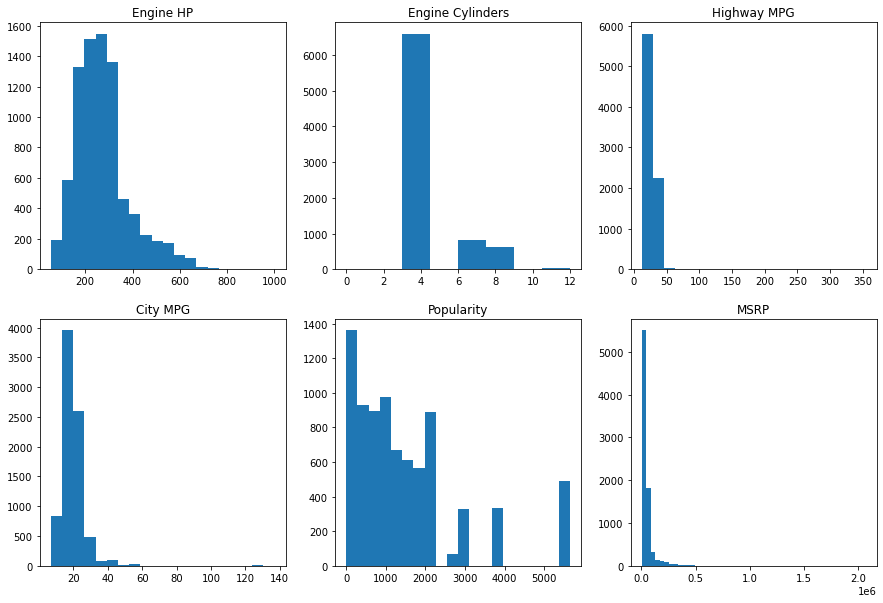

In [8]:
# create subplots for each numeric variable
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# plot histograms for Engine HP, Engine Cylinders, highway MPG, city MPG, Popularity, and MSRP
axs[0, 0].hist(df['Engine HP'], bins=20)
axs[0, 0].set_title('Engine HP')

axs[0, 1].hist(df['Engine Cylinders'], bins=8)
axs[0, 1].set_title('Engine Cylinders')

axs[0, 2].hist(df['highway MPG'], bins=20)
axs[0, 2].set_title('Highway MPG')

axs[1, 0].hist(df['city mpg'], bins=20)
axs[1, 0].set_title('City MPG')

axs[1, 1].hist(df['Popularity'], bins=20)
axs[1, 1].set_title('Popularity')

axs[1, 2].hist(df['MSRP'], bins=50)
axs[1, 2].set_title('MSRP')

# display the plot
plt.show()


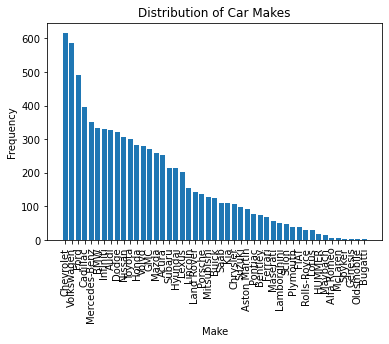

In [9]:
import matplotlib.pyplot as plt

# create a bar chart for the 'Make' variable
make_counts = df['Make'].value_counts()
plt.bar(make_counts.index, make_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Distribution of Car Makes')
plt.show()


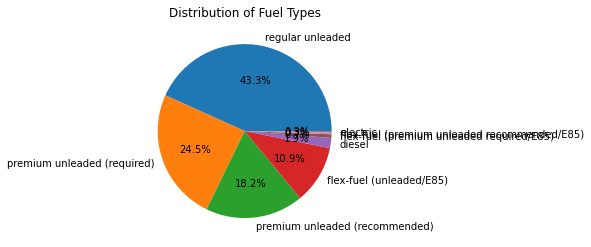

In [10]:
# create a pie chart for the 'Fuel Type' variable
fuel_type_counts = df['Engine Fuel Type'].value_counts()
plt.pie(fuel_type_counts.values, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.show()

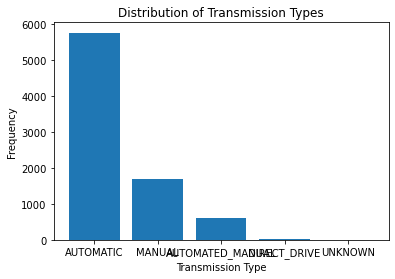

In [11]:
# create a bar chart for the 'Transmission Type' variable
trans_counts = df['Transmission Type'].value_counts()
plt.bar(trans_counts.index, trans_counts.values)
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.title('Distribution of Transmission Types')
plt.show()

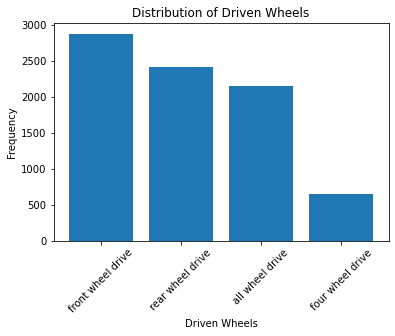

In [12]:
# create a bar chart for the 'Driven_Wheels' variable
wheels_counts = df['Driven_Wheels'].value_counts()
plt.bar(wheels_counts.index, wheels_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Driven Wheels')
plt.ylabel('Frequency')
plt.title('Distribution of Driven Wheels')
plt.show()

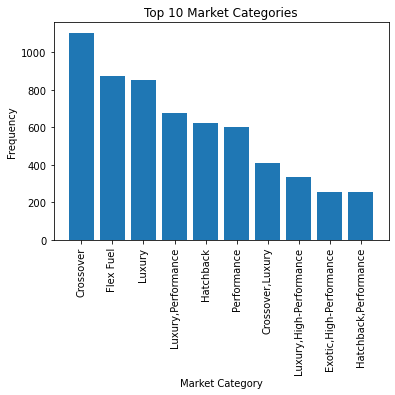

In [13]:

# create a bar chart for the 'Market Category' variable
mc_counts = df['Market Category'].value_counts().head(10)
plt.bar(mc_counts.index, mc_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Market Category')
plt.ylabel('Frequency')
plt.title('Top 10 Market Categories')
plt.show()


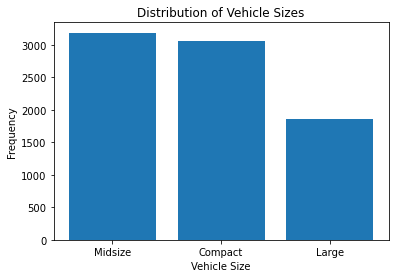

In [14]:
# create a bar chart for the 'Vehicle Size' variable
size_counts = df['Vehicle Size'].value_counts()
plt.bar(size_counts.index, size_counts.values)
plt.xlabel('Vehicle Size')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Sizes')
plt.show()

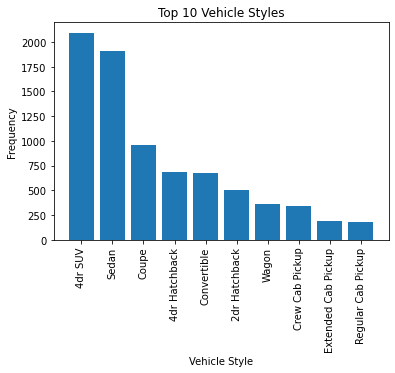

In [15]:
# create a bar chart for the 'Vehicle Style' variable
style_counts = df['Vehicle Style'].value_counts().head(10)
plt.bar(style_counts.index, style_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Style')
plt.ylabel('Frequency')
plt.title('Top 10 Vehicle Styles')
plt.show()

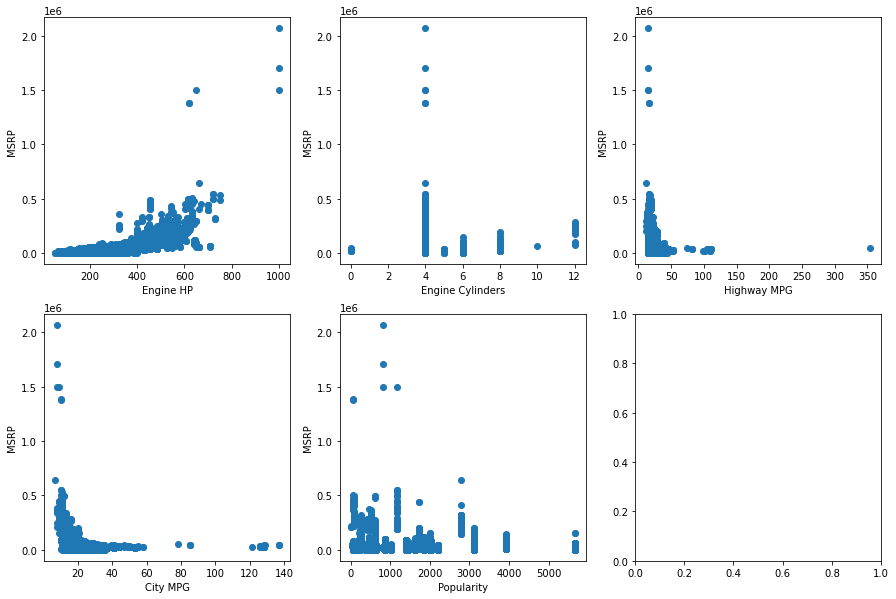

In [16]:
import matplotlib.pyplot as plt

# create subplots for each numeric variable
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# plot scatter plots for Engine HP, Engine Cylinders, highway MPG, city MPG, Popularity, and MSRP
axs[0, 0].scatter(df['Engine HP'], df['MSRP'])
axs[0, 0].set_xlabel('Engine HP')
axs[0, 0].set_ylabel('MSRP')

axs[0, 1].scatter(df['Engine Cylinders'], df['MSRP'])
axs[0, 1].set_xlabel('Engine Cylinders')
axs[0, 1].set_ylabel('MSRP')

axs[0, 2].scatter(df['highway MPG'], df['MSRP'])
axs[0, 2].set_xlabel('Highway MPG')
axs[0, 2].set_ylabel('MSRP')

axs[1, 0].scatter(df['city mpg'], df['MSRP'])
axs[1, 0].set_xlabel('City MPG')
axs[1, 0].set_ylabel('MSRP')

axs[1, 1].scatter(df['Popularity'], df['MSRP'])
axs[1, 1].set_xlabel('Popularity')
axs[1, 1].set_ylabel('MSRP')

# display the plot
plt.show()


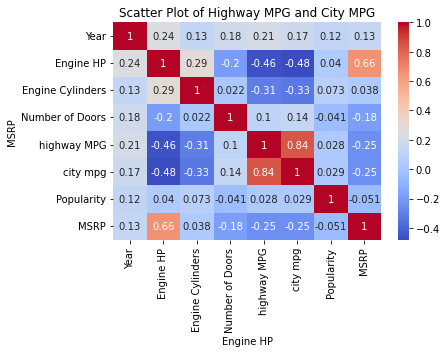

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
corr_matrix = df.corr()

# plot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# plot scatter plot between Engine HP and MSRP
sns.scatterplot(data=df, x='Engine HP', y='MSRP')
plt.title('Scatter Plot of Engine HP and MSRP')

# plot scatter plot between highway MPG and city MPG
sns.scatterplot(data=df, x='highway MPG', y='city mpg')
plt.title('Scatter Plot of Highway MPG and City MPG')

# display the plots
plt.show()


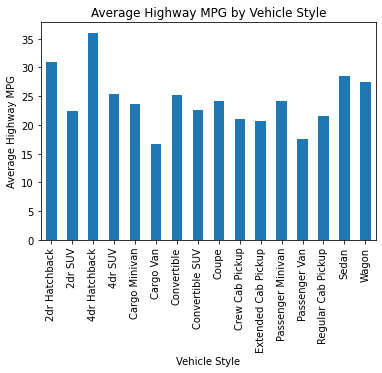

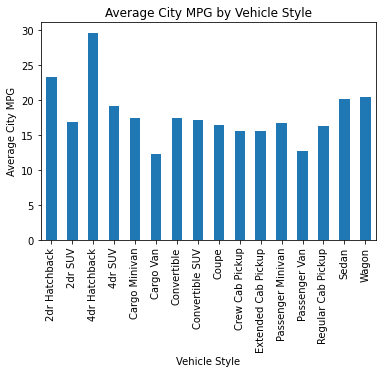

In [18]:
# Create a bar chart of average highway MPG by vehicle style
df.groupby('Vehicle Style')['highway MPG'].mean().plot(kind='bar')
plt.title('Average Highway MPG by Vehicle Style')
plt.xlabel('Vehicle Style')
plt.ylabel('Average Highway MPG')
plt.show()

# Create a bar chart of average city MPG by vehicle style
df.groupby('Vehicle Style')['city mpg'].mean().plot(kind='bar')
plt.title('Average City MPG by Vehicle Style')
plt.xlabel('Vehicle Style')
plt.ylabel('Average City MPG')
plt.show()
VARIATION CAR ENGINE HP,MPG and PRICE

C:\Users\SAJEER\AppData\Local\Temp/ipykernel_13812/3976933319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg MPG'] = (df['highway MPG'] + df['city mpg']) / 2


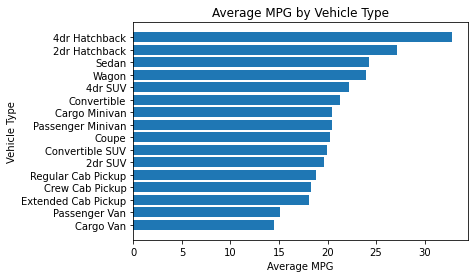

Vehicle Style
4dr Hatchback          32.836735
2dr Hatchback          27.127237
Sedan                  24.298062
Wagon                  23.935574
4dr SUV                22.167144
Convertible            21.285821
Cargo Minivan          20.500000
Passenger Minivan      20.430769
Coupe                  20.299479
Convertible SUV        19.916667
2dr SUV                19.642857
Regular Cab Pickup     18.863636
Crew Cab Pickup        18.279070
Extended Cab Pickup    18.089005
Passenger Van          15.090000
Cargo Van              14.441176
Name: Avg MPG, dtype: float64


In [19]:
# Create a new column for average MPG
df['Avg MPG'] = (df['highway MPG'] + df['city mpg']) / 2

# Group the data by vehicle type and calculate the mean MPG
mpg_by_type = df.groupby('Vehicle Style')['Avg MPG'].mean().sort_values()

# Plot a bar chart of the mean MPG by vehicle type
plt.barh(mpg_by_type.index, mpg_by_type.values)
plt.title('Average MPG by Vehicle Type')
plt.xlabel('Average MPG')
plt.ylabel('Vehicle Type')
plt.show()

# Print the vehicle types in descending order of their mean MPG
print(mpg_by_type.sort_values(ascending=False))


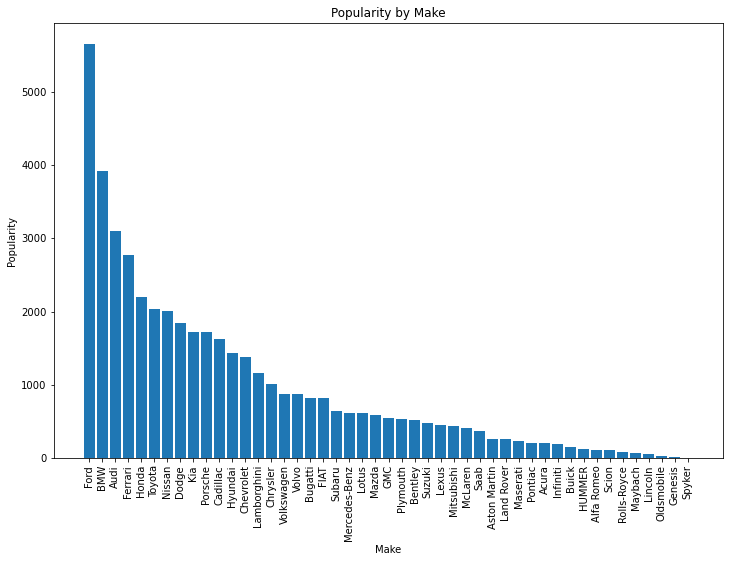

In [20]:
# Group the data by the Make and calculate the mean popularity for each make
popularity_by_make = df.groupby(['Make'])['Popularity'].mean().sort_values(ascending=False)

# Plot the popularity by make as a bar chart
plt.figure(figsize=(12,8))
plt.bar(popularity_by_make.index, popularity_by_make.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Popularity')
plt.title('Popularity by Make')
plt.show()


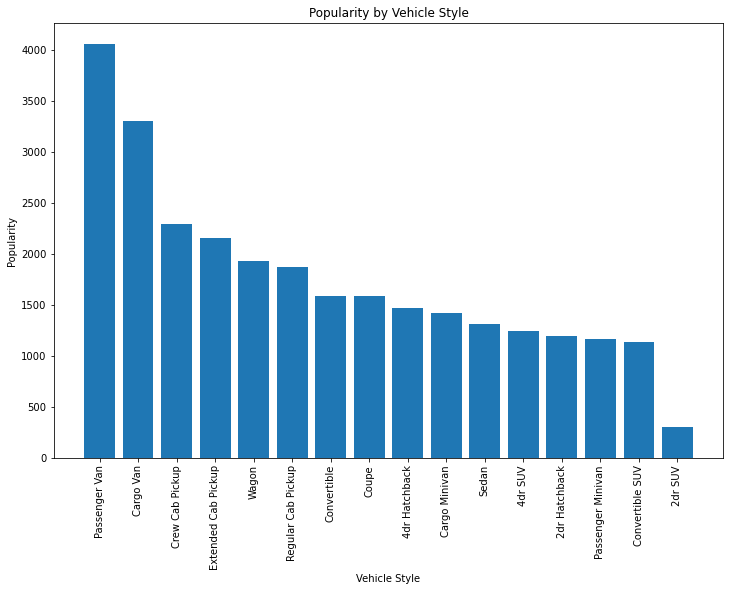

In [21]:


# Group the data by the Vehicle Style and calculate the mean popularity for each style
popularity_by_style = df.groupby(['Vehicle Style'])['Popularity'].mean().sort_values(ascending=False)

# Plot the popularity by style as a bar chart
plt.figure(figsize=(12,8))
plt.bar(popularity_by_style.index, popularity_by_style.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Style')
plt.ylabel('Popularity')
plt.title('Popularity by Vehicle Style')
plt.show()

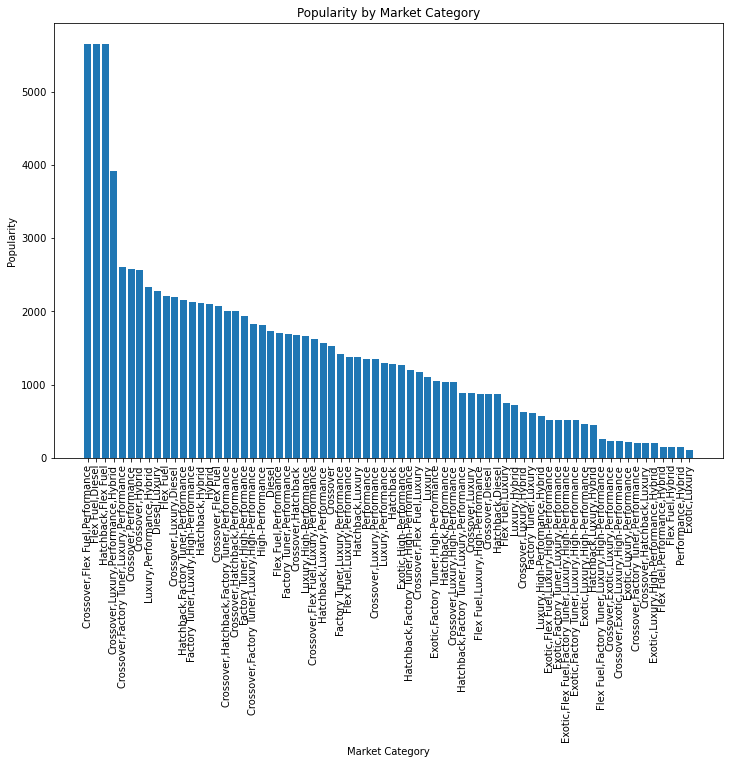

In [22]:
# Group the data by the Market Category and calculate the mean popularity for each category
popularity_by_category = df.groupby(['Market Category'])['Popularity'].mean().sort_values(ascending=False)

# Plot the popularity by category as a bar chart
plt.figure(figsize=(12,8))
plt.bar(popularity_by_category.index, popularity_by_category.values)
plt.xticks(rotation=90)
plt.xlabel('Market Category')
plt.ylabel('Popularity')
plt.title('Popularity by Market Category')
plt.show()

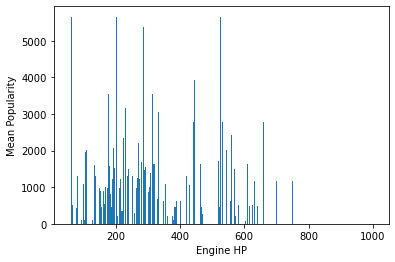

In [23]:
# group the data by a car feature and calculate the mean popularity for each group
grouped = df.groupby('Engine HP')['Popularity'].mean()

# plot a bar chart of the mean popularity for each group
plt.bar(grouped.index, grouped.values)
plt.xlabel('Engine HP')
plt.ylabel('Mean Popularity')
plt.show()

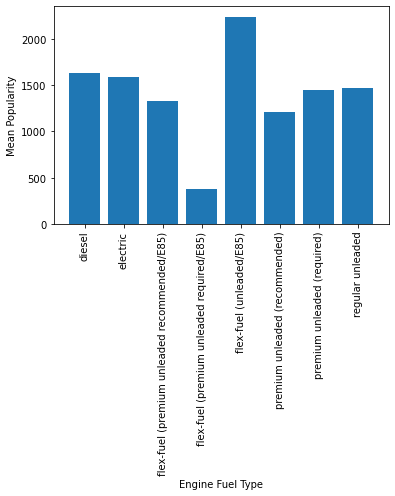

In [24]:
# group the data by a car feature and calculate the mean popularity for each group
grouped = df.groupby('Engine Fuel Type')['Popularity'].mean()

# plot a bar chart of the mean popularity for each group
plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=90)
plt.xlabel('Engine Fuel Type')
plt.ylabel('Mean Popularity')
plt.show()

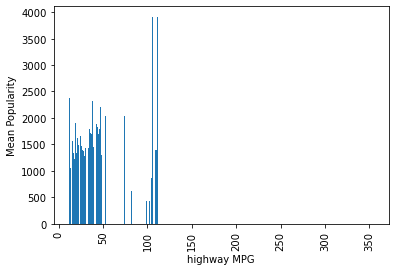

In [25]:
grouped = df.groupby('highway MPG')['Popularity'].mean()
# plot a bar chart of the mean popularity for each group
plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=90)
plt.xlabel('highway MPG')
plt.ylabel('Mean Popularity')
plt.show()

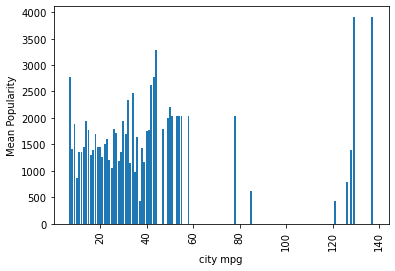

In [26]:
grouped = df.groupby('city mpg')['Popularity'].mean()
# plot a bar chart of the mean popularity for each group
plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=90)
plt.xlabel('city mpg')
plt.ylabel('Mean Popularity')
plt.show()

In [27]:
# identify the correlation between each feature column and the target variable (MSRP)
corr = df.corr()['MSRP']

# select the feature column with the highest correlation coefficient
most_important_feature = corr.drop('MSRP').idxmax()

print('The column most important to users is:', most_important_feature)

The column most important to users is: Engine HP


In [28]:
# identify the correlation between each feature column and the target variable (Popularity)
corr = df.corr()['Popularity']

# select the feature column with the highest correlation coefficient
most_important_feature = corr.drop('Popularity').idxmax()

print('The column most important to users is:', most_important_feature)

The column most important to users is: Year


In [29]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Avg MPG'],
      dtype='object')


# **TASK 1

Equation: y = 401.13x + -60047.58
R-squared: 0.43


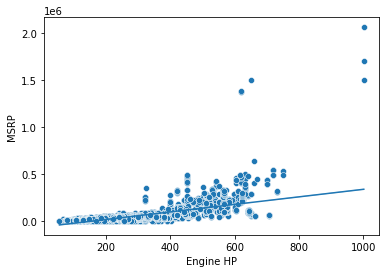

In [30]:
# select the features and target variable
X = df[['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'Number of Doors']]
y = df['MSRP']

# create a scatter plot
sns.scatterplot(x=X['Engine HP'], y=y)

# train a linear regression model
model = LinearRegression()
model.fit(X[['Engine HP']], y)

# plot the trendline
sns.lineplot(x=X['Engine HP'], y=model.predict(X[['Engine HP']]))

# extract the equation and R-squared value
print(f"Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
print(f"R-squared: {model.score(X[['Engine HP']], y):.2f}")

# **TASK 2

Vehicle Size                                              Compact           \
Engine Fuel Type                                           diesel electric   
Vehicle Style Market Category                                                
2dr Hatchback Hatchback                                       NaN      NaN   
              Hatchback,Diesel                            27140.0      NaN   
              Hatchback,Factory Tuner,Luxury,Performance      NaN      NaN   
              Hatchback,Factory Tuner,Performance             NaN      NaN   
              Hatchback,Hybrid                                NaN      NaN   
...                                                           ...      ...   
Wagon         Hybrid                                          NaN      NaN   
              Luxury                                          NaN      NaN   
              Luxury,High-Performance                         NaN      NaN   
              Luxury,Performance                              Na

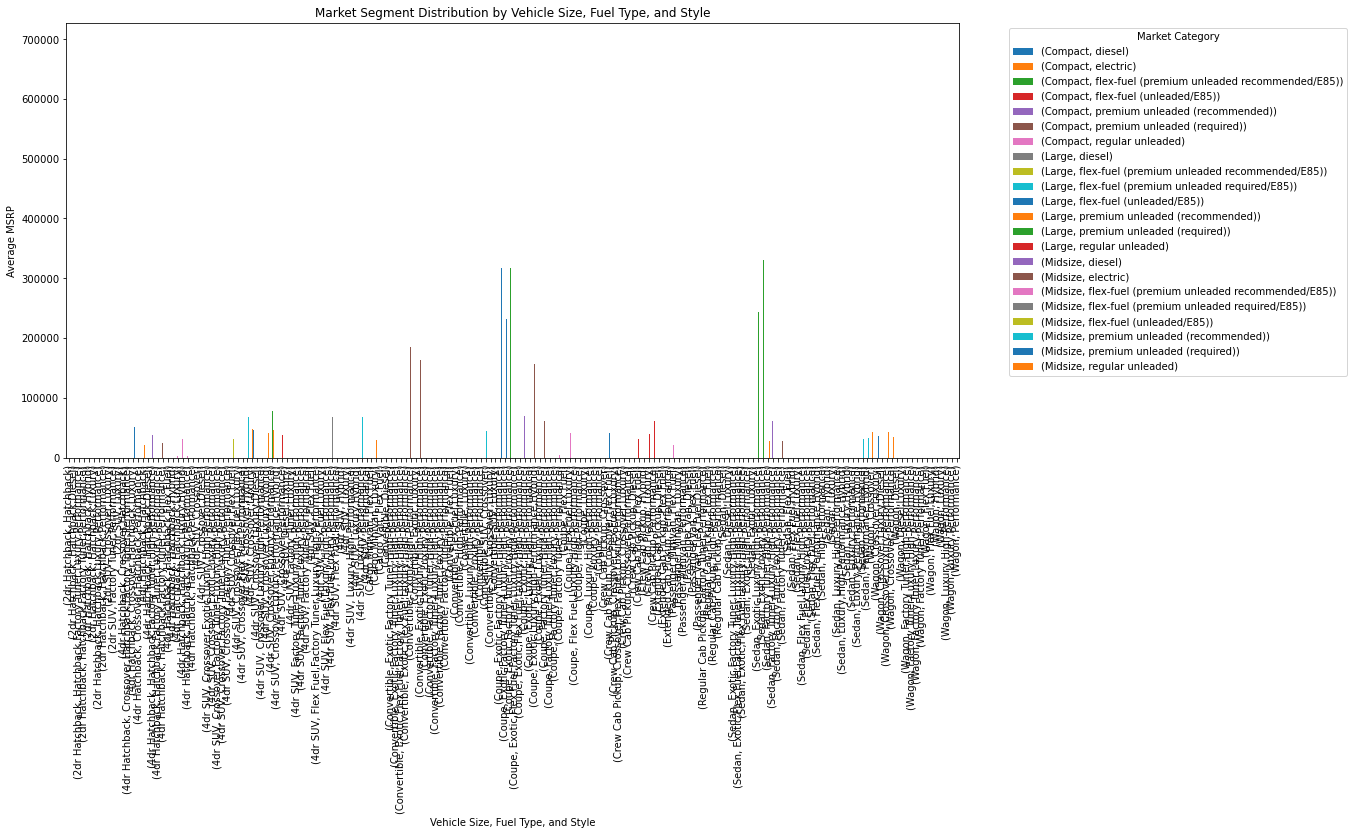

In [31]:
# Create a pivot table to segment the market based on consumer preferences and demographics
pivot_table = pd.pivot_table(df, values='MSRP', index=['Vehicle Style', 'Market Category'], columns=['Vehicle Size', 'Engine Fuel Type'], aggfunc='mean')

# Create a bar chart to show the distribution of market categories among different segments
pivot_table.plot(kind='bar', figsize=(16,8))
print(pivot_table)
plt.title('Market Segment Distribution by Vehicle Size, Fuel Type, and Style')
plt.xlabel('Vehicle Size, Fuel Type, and Style')
plt.ylabel('Average MSRP')
plt.legend(title='Market Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<AxesSubplot:>

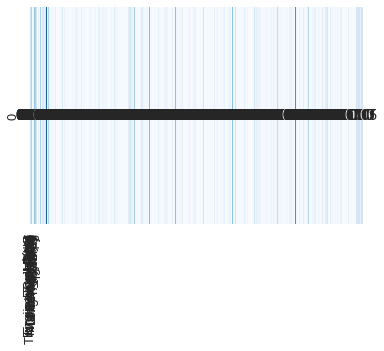

In [32]:
# select the features and target variable
X = df.drop(['MSRP'], axis=1)
y = df['MSRP']

# encode categorical variables
X = pd.get_dummies(X, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'])

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train a linear regression model
model = LinearRegression()
model.fit(X, y)

# calculate the feature importance
feature_importance = abs(model.coef_)
feature_importance /= feature_importance.max()

# create a heatmap to visualize the feature importance
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.heatmap(feature_importance.reshape(1, -1), cmap='Blues', annot=True, fmt='.2f', cbar=False, xticklabels=list(df.columns)[1:])
